In [1]:
import numpy as np
import pandas as pd

In [2]:
date = '0901_0905'
df1 = pd.read_csv('../.././data/SDGE_NODE_LMP/20220901_20220905_PRC_RTPD_LMP_RTPD_20220924_18_55_55_v3.csv')
df1

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP
0,2022-09-01T07:00:00-00:00,2022-09-01T07:15:00-00:00,2022-09-01,1,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,LMP,LMP_PRC,SANYSDRO_6_N004,ALL,1,208.60815,1,1
1,2022-09-01T08:00:00-00:00,2022-09-01T08:15:00-00:00,2022-09-01,2,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,LMP,LMP_PRC,SANYSDRO_6_N004,ALL,1,118.54245,1,1
2,2022-09-01T09:00:00-00:00,2022-09-01T09:15:00-00:00,2022-09-01,3,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,LMP,LMP_PRC,SANYSDRO_6_N004,ALL,1,117.84368,1,1
3,2022-09-01T10:00:00-00:00,2022-09-01T10:15:00-00:00,2022-09-01,4,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,LMP,LMP_PRC,SANYSDRO_6_N004,ALL,1,115.91150,1,1
4,2022-09-01T11:00:00-00:00,2022-09-01T11:15:00-00:00,2022-09-01,5,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,LMP,LMP_PRC,SANYSDRO_6_N004,ALL,1,115.42043,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2022-09-05T02:45:00-00:00,2022-09-05T03:00:00-00:00,2022-09-04,20,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,MGHG,LMP_GHG_PRC,SANYSDRO_6_N004,ALL,1,0.00000,4,20
1916,2022-09-05T03:45:00-00:00,2022-09-05T04:00:00-00:00,2022-09-04,21,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,MGHG,LMP_GHG_PRC,SANYSDRO_6_N004,ALL,1,0.00000,4,20
1917,2022-09-05T04:45:00-00:00,2022-09-05T05:00:00-00:00,2022-09-04,22,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,MGHG,LMP_GHG_PRC,SANYSDRO_6_N004,ALL,1,0.00000,4,20
1918,2022-09-05T05:45:00-00:00,2022-09-05T06:00:00-00:00,2022-09-04,23,SANYSDRO_6_N004,SANYSDRO_6_N004,SANYSDRO_6_N004,RTPD,MGHG,LMP_GHG_PRC,SANYSDRO_6_N004,ALL,1,0.00000,4,20


In [3]:
import sys
import time

def restart_line():
    sys.stdout.flush()
    time.sleep(0.05)
    sys.stdout.write('\r')
    sys.stdout.flush()
    

In [4]:
index = 0
N = 257 # Total file
import os
for root, dirs, files in os.walk(r'/Users/kaiwencheng/Desktop/research/SRIP/carbon_related_data_analytics/power_plant_related/data/SDGE_NODE_LMP'):
    for filename in files:
        if(filename[-4:]!='.csv'):
            continue
        
        sys.stdout.write('Concatinating {}/{}'.format(index,N))
        restart_line()

        index += 1
        df2 = pd.read_csv('../.././data/SDGE_NODE_LMP/{}'.format(filename))
        df1 = pd.concat([df1,df2],ignore_index=True)


FileNotFoundError: [Errno 2] No such file or directory: '../.././data/SDGE_NODE_LMP/20220816_20220823_PRC_RTPD_LMP_RTPD_20220829_13_36_33_v3.csv'

In [5]:
# df1['NODE_ID'].drop_duplicates().shape
Node = df1

In [6]:
# Get LMP Online
LMP = Node[Node['LMP_TYPE']=='LMP'] 
MCC = Node[Node['LMP_TYPE']=='MCC'] # Congestion
MCE = Node[Node['LMP_TYPE']=='MCE'] # Energy
MCL = Node[Node['LMP_TYPE']=='MCL'] # Loss

In [7]:
LMP.iloc[672:700]

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,PRC,OPR_INTERVAL,GROUP
3360,2022-09-04T07:00:00-00:00,2022-09-04T07:15:00-00:00,2022-09-04,1,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,139.98083,1,16
3361,2022-09-04T08:00:00-00:00,2022-09-04T08:15:00-00:00,2022-09-04,2,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,117.33364,1,16
3362,2022-09-04T09:00:00-00:00,2022-09-04T09:15:00-00:00,2022-09-04,3,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,99.59717,1,16
3363,2022-09-04T10:00:00-00:00,2022-09-04T10:15:00-00:00,2022-09-04,4,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,106.50896,1,16
3364,2022-09-04T11:00:00-00:00,2022-09-04T11:15:00-00:00,2022-09-04,5,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,98.38295,1,16
3365,2022-09-04T12:00:00-00:00,2022-09-04T12:15:00-00:00,2022-09-04,6,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,100.11913,1,16
3366,2022-09-04T13:00:00-00:00,2022-09-04T13:15:00-00:00,2022-09-04,7,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,100.01511,1,16
3367,2022-09-04T14:00:00-00:00,2022-09-04T14:15:00-00:00,2022-09-04,8,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,101.89681,1,16
3368,2022-09-04T15:00:00-00:00,2022-09-04T15:15:00-00:00,2022-09-04,9,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,90.10735,1,16
3369,2022-09-04T16:00:00-00:00,2022-09-04T16:15:00-00:00,2022-09-04,10,NOISLMTR_6_N101,NOISLMTR_6_N101,NOISLMTR_6_N101,RTPD,LMP,LMP_PRC,NOISLMTR_6_N101,ALL,1,98.99254,1,16


In [8]:
def generateTS(LMP):
    Node_ID = LMP['NODE_ID'].drop_duplicates().to_numpy()
    time = LMP['INTERVALSTARTTIME_GMT'].drop_duplicates().to_numpy()
    Node_ID.dtype = object
    time.dtype = object

    N_node = Node_ID.shape[0]
    N_timeStep = time.shape[0]
    total_N = LMP.shape[0]
    
    LMP_matrix = np.zeros((N_node,N_timeStep+1),dtype=object)

    total_N = N_node*N_timeStep
    PRC_col = -3
    node_col = -10
    
    print('Number of Node: {}'.format(N_node))
    print('Number of timestep: {}'.format(N_timeStep))
    print('Total Entries: {}'.format(total_N))
    print('Entries / Timestep = {}'.format(int(total_N/N_timeStep)))
    print('--------------------------------')

    for i in range(total_N):
        LMP_matrix[int(i/N_timeStep)][int(i%N_timeStep)+1] = LMP.iloc[i][PRC_col] # Plus one to make space for PNODE index

    for i in range(N_node):
        LMP_matrix[i][0] = Node_ID[i]
        
    time = np.insert(time,0,'PNODE_ID')
    pd_LMP = pd.DataFrame(LMP_matrix,columns=time,index=Node_ID)
    pd_LMP_Trans = pd_LMP.T
    
    return pd_LMP,pd_LMP_Trans

In [9]:
pd_MCC,pd_MCC_Trans = generateTS(MCC)
pd_LMP,pd_LMP_Trans = generateTS(LMP)
pd_MCE,pd_MCE_trans = generateTS(MCE)

Number of Node: 257
Number of timestep: 384
Total Entries: 98688
Entries / Timestep = 257
--------------------------------
Number of Node: 257
Number of timestep: 384
Total Entries: 98688
Entries / Timestep = 257
--------------------------------
Number of Node: 257
Number of timestep: 384
Total Entries: 98688
Entries / Timestep = 257
--------------------------------


In [10]:
pd_MCC_Trans = pd_MCC_Trans.iloc[1:]

In [11]:
# sort by time
pd_MCC_Trans = pd_MCC_Trans.sort_index(ascending=True)

In [12]:
pd_MCC_Trans

,SANYSDRO_6_N004,NOISLMTR_6_N101,MISSION_6_N001,EASTGATE_6_N101,F_6_N001,BATIQTOS_1_N015,PARADISX_6_N004,GENESEE_6_N015,PALOMAR_1_N001,PLOALTO_1_N019,...,BERNARDO_6_N013,BDLRKSP2_7_B1,DELMAR_6_N011,MONSRATE_6_N007,GRANITE_6_N007,MISSION_6_N049,IMPRLBCH_6_N004,RINCON_1_N003,RCARMEL_6_N001,BDLRKSP1_7_B1
2022-09-01T07:00:00-00:00,98.35911,98.60331,99.3359,101.12525,99.3359,96.31991,98.60331,101.20323,95.83151,-16.84223,...,10.08637,9.6535,9.21922,9.65209,10.51923,9.21922,9.21922,9.21922,21.72068,9.65209
2022-09-01T07:15:00-00:00,8.86856,8.86856,8.86856,8.86856,8.86856,8.91358,8.86856,8.86856,8.91358,-10.17216,...,-2.43828,-2.81605,-2.43828,-2.01865,-2.81605,-2.43828,-2.81605,0.0,-2.43828,-2.81605
2022-09-01T07:30:00-00:00,14.43587,14.43587,14.47242,14.47242,14.47242,14.58525,14.43587,14.47242,14.58525,-16.44033,...,4.89259,4.46714,4.67986,5.10531,4.46714,4.67986,4.46714,0.0,4.67986,4.46714
2022-09-01T07:45:00-00:00,16.49623,16.49623,16.54152,16.54152,16.54152,16.62484,16.49623,16.54152,16.62484,-18.68257,...,10.75982,9.82419,10.292,11.22764,9.82419,10.292,9.82419,0.0,10.292,9.82419
2022-09-01T08:00:00-00:00,2.99366,2.99366,3.00187,3.00943,3.00187,3.01699,2.99366,3.00943,3.01699,-3.39042,...,101.93582,98.35911,101.20323,90.69704,99.8243,99.3359,98.35911,-14.53822,102.83464,98.35911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05T05:45:00-00:00,16.65836,17.28979,17.28979,17.32676,17.28979,18.03213,16.65836,17.32676,18.03213,8.28148,...,26.64514,-265.65054,26.64514,28.08732,26.00022,26.49279,58.27624,35.64923,26.64514,-265.65054
2022-09-05T06:00:00-00:00,23.2094,23.2094,23.27791,23.34641,23.27791,24.16456,22.45975,23.34641,24.16456,15.41292,...,25.10094,24.28358,25.10094,26.61541,24.28358,24.98069,24.28358,28.25851,25.10094,24.28358
2022-09-05T06:15:00-00:00,21.62467,21.62467,21.62467,21.69091,21.62467,22.50931,20.93875,21.69091,23.19523,14.83826,...,26.22296,25.3582,26.1008,27.83033,25.3582,26.1008,25.3582,28.70867,26.22296,25.3582
2022-09-05T06:30:00-00:00,11.81338,11.81338,11.83483,11.85628,11.83483,12.78012,11.81338,12.30748,12.78012,4.82681,...,22.62144,21.88005,22.62144,24.18527,21.88005,22.54037,21.88005,19.04942,22.62144,21.88005


In [13]:
pd_MCC_Trans

,SANYSDRO_6_N004,NOISLMTR_6_N101,MISSION_6_N001,EASTGATE_6_N101,F_6_N001,BATIQTOS_1_N015,PARADISX_6_N004,GENESEE_6_N015,PALOMAR_1_N001,PLOALTO_1_N019,...,BERNARDO_6_N013,BDLRKSP2_7_B1,DELMAR_6_N011,MONSRATE_6_N007,GRANITE_6_N007,MISSION_6_N049,IMPRLBCH_6_N004,RINCON_1_N003,RCARMEL_6_N001,BDLRKSP1_7_B1
2022-09-01T07:00:00-00:00,98.35911,98.60331,99.3359,101.12525,99.3359,96.31991,98.60331,101.20323,95.83151,-16.84223,...,10.08637,9.6535,9.21922,9.65209,10.51923,9.21922,9.21922,9.21922,21.72068,9.65209
2022-09-01T07:15:00-00:00,8.86856,8.86856,8.86856,8.86856,8.86856,8.91358,8.86856,8.86856,8.91358,-10.17216,...,-2.43828,-2.81605,-2.43828,-2.01865,-2.81605,-2.43828,-2.81605,0.0,-2.43828,-2.81605
2022-09-01T07:30:00-00:00,14.43587,14.43587,14.47242,14.47242,14.47242,14.58525,14.43587,14.47242,14.58525,-16.44033,...,4.89259,4.46714,4.67986,5.10531,4.46714,4.67986,4.46714,0.0,4.67986,4.46714
2022-09-01T07:45:00-00:00,16.49623,16.49623,16.54152,16.54152,16.54152,16.62484,16.49623,16.54152,16.62484,-18.68257,...,10.75982,9.82419,10.292,11.22764,9.82419,10.292,9.82419,0.0,10.292,9.82419
2022-09-01T08:00:00-00:00,2.99366,2.99366,3.00187,3.00943,3.00187,3.01699,2.99366,3.00943,3.01699,-3.39042,...,101.93582,98.35911,101.20323,90.69704,99.8243,99.3359,98.35911,-14.53822,102.83464,98.35911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-05T05:45:00-00:00,16.65836,17.28979,17.28979,17.32676,17.28979,18.03213,16.65836,17.32676,18.03213,8.28148,...,26.64514,-265.65054,26.64514,28.08732,26.00022,26.49279,58.27624,35.64923,26.64514,-265.65054
2022-09-05T06:00:00-00:00,23.2094,23.2094,23.27791,23.34641,23.27791,24.16456,22.45975,23.34641,24.16456,15.41292,...,25.10094,24.28358,25.10094,26.61541,24.28358,24.98069,24.28358,28.25851,25.10094,24.28358
2022-09-05T06:15:00-00:00,21.62467,21.62467,21.62467,21.69091,21.62467,22.50931,20.93875,21.69091,23.19523,14.83826,...,26.22296,25.3582,26.1008,27.83033,25.3582,26.1008,25.3582,28.70867,26.22296,25.3582
2022-09-05T06:30:00-00:00,11.81338,11.81338,11.83483,11.85628,11.83483,12.78012,11.81338,12.30748,12.78012,4.82681,...,22.62144,21.88005,22.62144,24.18527,21.88005,22.54037,21.88005,19.04942,22.62144,21.88005


In [14]:
time_step = pd_MCC_Trans.index.to_numpy()

for i in range(time_step.shape[0]):
    time_step[i] = pd.to_datetime(time_step[i])

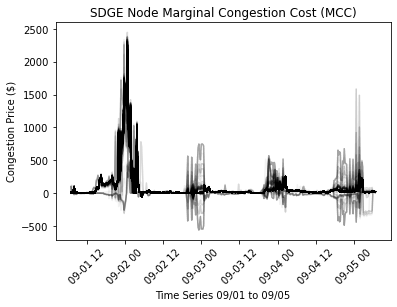

In [17]:
import matplotlib.pyplot as plt

for i in range(256):
    a =  pd_MCC_Trans.to_numpy()[:,i]
    # print()
    plt.plot(time_step,a.T,alpha=0.05,color='black')
    plt.xticks(rotation=45)
    plt.title('SDGE Node Marginal Congestion Cost (MCC)')
    plt.xlabel('Time Series 09/01 to 09/05')
    plt.ylabel('Congestion Price ($)')

In [82]:
# Add LMP with Lat,Long
node_loc = pd.read_csv('../../data/Node_data/CAISO_SDGE_Node.csv')

def addLatLng(pd_MCC,node_loc):
    pd_MCC = pd_MCC.set_index('PNODE_ID').join(node_loc.set_index('PNODE_ID'))
    return pd_MCC

In [83]:
pd_MCC = addLatLng(pd_MCC,node_loc)
pd_LMP = addLatLng(pd_LMP,node_loc)
pd_MCE = addLatLng(pd_MCE,node_loc)

In [85]:
pd_MCC

,2022-09-01T07:00:00-00:00,2022-09-01T08:00:00-00:00,2022-09-01T09:00:00-00:00,2022-09-01T10:00:00-00:00,2022-09-01T11:00:00-00:00,2022-09-01T12:00:00-00:00,2022-09-01T13:00:00-00:00,2022-09-01T14:00:00-00:00,2022-09-01T15:00:00-00:00,2022-09-01T16:00:00-00:00,...,AS_ID,RES_TYPE,RES_ID,BUS_ID,FNMVERSION,RELEASE_DATE,GROUP,Lat,Long,Unnamed: 10
PNODE_ID,,,,,,,,,,,,,,,,,,,,,
ALPINE_6_N001,9.21922,98.60331,2.99366,4.01117,3.53726,0.0,9.33523,12.68292,68.69368,194.43352,...,AS_SP26,LOAD,ALPINE_6_LD32,22004_ALPINE _69.0_LD32,22M7_DB114,2022-07-28 0:00:00,65,32.827798,-116.789691,NaN
ALPINE_6_N001,9.21922,98.60331,2.99366,4.01117,3.53726,0.0,9.33523,12.68292,68.69368,194.43352,...,AS_SP15,LOAD,ALPINE_6_LD32,22004_ALPINE _69.0_LD32,22M7_DB114,2022-07-28 0:00:00,65,32.827798,-116.789691,NaN
ALPINE_6_N005,9.21922,101.12525,3.00943,4.03231,3.53726,0.0,9.33523,12.71383,71.35852,200.48152,...,AS_SP26,LOAD,ALPINE_6_LD30,22004_ALPINE _69.0_LD30,22M7_DB114,2022-07-28 0:00:00,64,32.827753,-116.790115,NaN
ALPINE_6_N005,9.21922,101.12525,3.00943,4.03231,3.53726,0.0,9.33523,12.71383,71.35852,200.48152,...,AS_SP15,LOAD,ALPINE_6_LD30,22004_ALPINE _69.0_LD30,22M7_DB114,2022-07-28 0:00:00,64,32.827753,-116.790115,NaN
ARTESN_6_N001,101.93582,101.93582,3.00943,4.03231,3.53726,0.0,9.33523,12.71383,72.5429,202.80745,...,AS_SP26,LOAD,ARTESN_6_LD32,22009_ARTESN _69.0_LD32,22M7_DB114,2022-07-28 0:00:00,135,33.021228,-117.134101,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WARENCYN_6_N001,9.65209,101.20323,3.00943,4.03231,3.53726,0.0,9.33523,12.71383,71.65462,200.48152,...,AS_SP15,LOAD,WRNCYN_6_LD30,22880_WARENCYN_69.0_LD30,22M7_DB114,2022-07-28 0:00:00,5339,33.015456,-117.002003,NaN
WARENCYN_6_N002,9.65209,99.5801,2.99366,4.01117,3.53726,0.0,9.33523,12.68292,69.58196,197.27087,...,AS_SP26,LOAD,WRNCYN_6_LD20,22880_WARENCYN_69.0_LD20,22M7_DB114,2022-07-28 0:00:00,5338,33.015456,-117.002358,NaN
WARENCYN_6_N002,9.65209,99.5801,2.99366,4.01117,3.53726,0.0,9.33523,12.68292,69.58196,197.27087,...,AS_SP15,LOAD,WRNCYN_6_LD20,22880_WARENCYN_69.0_LD20,22M7_DB114,2022-07-28 0:00:00,5338,33.015456,-117.002358,NaN


In [1]:

pd_MCC_Trans

NameError: name 'pd_MCC_Trans' is not defined

In [86]:
pd_LMP.to_csv('./SDGE_Node_LMP_TS_{}.csv'.format(date))
pd_MCC.to_csv('./SDGE_Node_MCC_TS_{}.csv'.format(date))

pd_LMP_Trans.to_csv('./SDGE_Node_LMP_TS_T_{}.csv'.format(date))
pd_MCC_Trans.to_csv('./SDGE_Node_MCC_TS_T_{}.csv'.format(date))